# This is about Chapter 6, Think Bayes by Allen Downey

- In Bayesian estimation, the result comes in the form of a posterior distribution
- Bayesian methods are most useful when you can carry the posterior distribution into the next step of the analysis to perform some kind of decision analysis.
- Summarizing the posterior distribution by computing the mean or the maximum likelihood estimate is not the goal of Bayesian estimation. If that is all you need, you probably don't need Bayesian methods in the first place.

### Procedure of Bayesian Analysis

1. Think about hypotheses and build up Prior distribution
1. Then compute Likelihood for each hypothesis
1. Try to compute posterior distribution
1. Then, try to make a decision using the posterior distribution.

### 1. Let's make prior distribution

In [2]:
import csv
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [7]:
datafile1 = 'showcases.2011.csv'
datafile2 = 'showcases.2012.csv'

showcase1 = []
showcase2 = []
with open(datafile1, 'r') as file:
    reader = csv.reader (file)
    for line in reader:
#        print (line)
        if line[0] == 'Showcase 1':
            showcase1 += line[1:]
        #
        if line[0] == 'Showcase 2':
            showcase2 += line[1:]
    #
#
with open(datafile2, 'r') as file:
    reader = csv.reader (file)
    for line in reader:
#        print (line)
        if line[0] == 'Showcase 1':
            showcase1 += line[1:]
        #
        if line[0] == 'Showcase 2':
            showcase2 += line[1:]
    #
#

In [8]:
print (showcase1)

['50969', '21901', '32815', '44432', '24273', '30554', '20963', '28941', '25851', '28800', '37703', '34774', '25268', '44044', '32516', '30827', '40374', '27698', '23590', '38625', '24026', '37449', '34268', '22281', '22890', '24226', '25448', '32525', '36799', '27380', '25903', '31769', '22853', '23202', '20721', '28451', '26154', '27019', '51959', '35811', '24885', '24648', '30707', '23744', '45078', '20773', '30892', '29971', '37423', '33593', '24866', '24628', '24827', '29248', '24818', '28762', '31838', '22268', '38892', '22599', '31705', '23299', '21394', '22589', '30573', '33009', '19612', '28550', '49937', '36915', '33400', '34516', '31516', '51108', '23981', '26383', '39801', '39201', '19563', '20418', '28465', '22356', '24150', '20425', '23926', '20860', '35526', '20912', '27426', '26393', '25329', '22434', '31933', '23986', '24729', '21747', '27273', '21681', '29324', '35874', '30397', '27310', '28414', '32535', '22886', '29842', '35954', '27883', '31268', '21563', '39642', 

In [14]:
tmp = [int(s) for s in showcase1]
showcase1 = np.array(tmp)
showcase2 = np.array( [int(s) for s in showcase2])

In [16]:
print (showcase1.shape, showcase1[:10])

(313,) [50969 21901 32815 44432 24273 30554 20963 28941 25851 28800]


#### Let's read all of the data file.
- Maybe it's better to make a function to read the file
- switch/case for Python: https://www.pydanny.com/why-doesnt-python-have-switch-case.html

In [19]:
datafile = [datafile1, datafile2]

showcase1 = []
showcase2 = []
bid1 = []
bid2 = []
diff1 = []
diff2 = []
for afile in datafile:
    with open(afile, 'r') as file:
        reader = csv.reader (file)
        for line in reader:
    #        print (line)
            if line[0] == 'Showcase 1':
                showcase1 += line[1:]
            #
            if line[0] == 'Showcase 2':
                showcase2 += line[1:]
            if line[0] == 'Bid 1': 
                bid1 += line[1:]
            if line[0] == 'Bid 2':
                bid2 += line[1:]
            if line[0] == 'Difference 1':
                diff1 += line[1:]
            if line[0] == 'Difference 2':
                diff2 += line[1:]
        #
    #
#
showcase1 = np.array( [int(s) for s in showcase1])
showcase2 = np.array( [int(s) for s in showcase2])
bid1 = np.array( [int(s) for s in bid1])
bid2 = np.array( [int(s) for s in bid2])
diff1 = np.array( [int(s) for s in diff1])
diff2 = np.array( [int(s) for s in diff2])

In [21]:
bid1[:10]

array([42000, 14000, 32000, 27000, 18750, 27222, 25000, 35000, 22500,
       21300])

### Prior distribution of showcase prices is estimated by KDE

- See https://jakevdp.github.io/blog/2013/12/01/kernel-density-estimation/

In [25]:
from scipy.stats import gaussian_kde

In [48]:
prior_kde1 = scipy.stats.gaussian_kde (showcase1)
prior_kde2 = scipy.stats.gaussian_kde (showcase2)

In [49]:
min(showcase1), max(showcase1), min(showcase2), max(showcase2)

(19563, 58342, 18349, 71628)

In [50]:
# Let's choose the domain of prices = [0, 75000]
low, high = 0, 75000
n = 101
xs = np.linspace(low, high, n)

In [51]:
xs

array([    0.,   750.,  1500.,  2250.,  3000.,  3750.,  4500.,  5250.,
        6000.,  6750.,  7500.,  8250.,  9000.,  9750., 10500., 11250.,
       12000., 12750., 13500., 14250., 15000., 15750., 16500., 17250.,
       18000., 18750., 19500., 20250., 21000., 21750., 22500., 23250.,
       24000., 24750., 25500., 26250., 27000., 27750., 28500., 29250.,
       30000., 30750., 31500., 32250., 33000., 33750., 34500., 35250.,
       36000., 36750., 37500., 38250., 39000., 39750., 40500., 41250.,
       42000., 42750., 43500., 44250., 45000., 45750., 46500., 47250.,
       48000., 48750., 49500., 50250., 51000., 51750., 52500., 53250.,
       54000., 54750., 55500., 56250., 57000., 57750., 58500., 59250.,
       60000., 60750., 61500., 62250., 63000., 63750., 64500., 65250.,
       66000., 66750., 67500., 68250., 69000., 69750., 70500., 71250.,
       72000., 72750., 73500., 74250., 75000.])

In [54]:
# Now, PMF is computed based on the prior density function

def MakePmf (xs, kde):
    p = np.zeros(xs.shape)
    for i in range(xs.shape[0]):
        p[i] = kde.evaluate (xs[i])

    p /= sum(p)
    return p
#

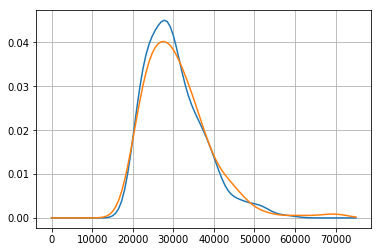

In [55]:
prior_pmf1 = MakePmf (xs, prior_kde1)
prior_pmf2 = MakePmf (xs, prior_kde2)

plt.grid(True)
plt.plot (xs, prior_pmf1, xs, prior_pmf2)

Now we finished to compute prior distributions for player 1 and player 2 respectively.

### Likelihood Estimation

- When player 1 sees the prize presented in the show, he guesses the price. What is the likelihood of the guess given the true price of the prize?
- Let's model that the guess has a Gaussian distribution with mean as the true price and a variace which is not known.
- The variance model is chosen to be the variance of the diff samples
    - To evaluate the variance of diff data, let's examine their CDF first.

In [61]:
def MakeCdf (xs, diff):
    cdf = np.zeros(xs.shape)
    for i in range(xs.shape[0]):
        cnt = 0
        for d in diff:
            if d <= xs[i]:
                cnt +=1
        cdf[i] = cnt
    cdf /= diff.shape[0]

    return cdf
#

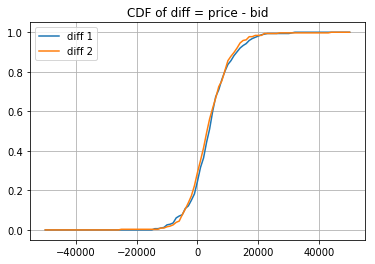

In [86]:
xx = np.linspace (-50000, 50000, 101)
cdf_diff1 = MakeCdf (xx, diff1)
cdf_diff2 = MakeCdf (xx, diff2)

plt.title ('CDF of diff = price - bid')
plt.grid (True)
plt.plot (xx, cdf_diff1, label='diff 1')
plt.plot (xx, cdf_diff2, label='diff 2')
plt.legend(loc='best')
#plt.plot (xx, cdf_diff2)

In [87]:
def evaluateCDF (xs, cdf, x):
    for i in range(xs.shape[0]):
        if xs[i] > x:
            return cdf[i-1]
#

In [88]:
print ('@ Overbid ratio for player1 = {:.2f}  player2 = {:.2f}'.format(evaluateCDF(xx, cdf_diff1, 0), evaluateCDF(xx, cdf_diff2, 0)))

@ Overbid ratio for player1 = 0.25  player2 = 0.29


In [89]:
sigma1 = np.std (diff1) # simply compute sample std using the data
sigma2 = np.std (diff2)
print ('@ std = {:.2f}    {:.2f}'.format(sigma1, sigma2))

@ std = 6888.88    6875.25


In [97]:
# likelihood density = Gaussain (0, sigma_diff1)
# likelihood (guess) = scipy.stats.norm.pdf (price - guess, 0, sigma_diff1)
guess1 = 20000
likeli1 = np.zeros(xs.shape)
post1 = np.zeros(xs.shape)
for i in range(xs.shape[0]):  # for each price
    likeli1[i] = scipy.stats.norm.pdf(xs[i] - guess1, 0, sigma1)
    post1[i] = likeli1[i] * prior_pmf1[i]
post1 /= np.sum(post1)

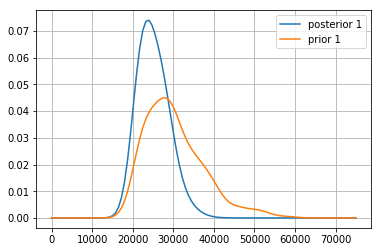

In [106]:
plt.grid(True)
plt.plot (xs, post1, label='posterior 1') 
plt.plot (xs, prior_pmf1, label='prior 1')
plt.legend (loc='best')

In [127]:
indx = np.argmax(post1)
print ('@ max posterior value {:.2f} at ${:.2f}'.format(post1[indx], xs[indx]))
indx_prior = np.argmax(prior_pmf1)
print ('@ max prior value {:.2f} at ${:.2f}'.format(prior_pmf1[indx_prior], xs[indx_prior]))

@ max posterior value 0.07 at $24000.00
@ max prior value 0.05 at $27750.00


- You guessed that the price would be \$20,000, but the maximum posterior probability is found to be at \$24,000.
- If you think the price is \$20000, then you should believe the price is \$24000. 

In [120]:
# Posterior mean
mean = 0.
for x, p in zip(xs, post1):
    mean += x*p
print ('@ Posterior mean = ${:.0f}'.format(mean))

@ Posterior mean = $25096


In [103]:
class Player:
    def __init__(self, xs, showcase, bid, diff):
        self.sigma = np.std(diff)
        self.prior = np.zeros (xs.shape[0])  # prior pmf
        self.likeli = np.zeros (xs.shape[0])
        self.post = np.zeros (xs.shape[0])
        # put code for prior
    def Posterior (self, guess):
        # code for likelihood
        # code for posterior
        print ('@ Posterior distribution for ', guess)

In [104]:
# likelihood density = Gaussain (0, sigma_diff1)
# likelihood (guess) = scipy.stats.norm.pdf (price - guess, 0, sigma_diff1)
guess2 = 40000
sigma2 = np.std (diff2)
likeli2 = np.zeros(xs.shape)
post2 = np.zeros(xs.shape)
for i in range(xs.shape[0]):  # for each price
    likeli2[i] = scipy.stats.norm.pdf(xs[i] - guess2, 0, sigma2)
    post2[i] = likeli2[i] * prior_pmf2[i]
post2 /= np.sum(post2)

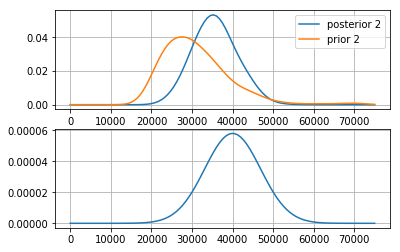

In [124]:
plt.subplot (211)
plt.grid(True)
plt.plot (xs, post2, label='posterior 2')
plt.plot (xs, prior_pmf2, label='prior 2')
plt.legend (loc='best')
plt.subplot (212)
plt.grid(True)
plt.plot (xs, likeli2, label='likelihood 2')

We just finished computing two posterior distributions for two guesses 20000 and 40000.

### What is the optimal bid based on the posterior distribution?

Now we will make use of the posterior distribution to make a good decision for the bid!